In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib import style

import numpy as np
from scipy import stats
import scipy.stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro 
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
matplotlib.rc('font',family="NanumGothic")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os


import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

os.environ["PATH"]+=os.pathsep+"~"
matplotlib.rc('font',family="NanumGothic")

#### 데이터 구성 확인

In [2]:
df_order=pd.read_csv("log_order_sheet_001.csv",engine="python")
df_member=pd.read_csv("master_member_sheet_001.csv",engine="python")
df_product=pd.read_csv("master_product_sheet_002.csv",engine="python")
df_cat=pd.read_csv("modifed_log_order_with_category.csv",engine="python")
df_cat["영업이익"]=df_order["상품구매금액"]-df_order["공급원가"]*df_order["주문수량"]
df_order["영업이익"]=df_order["상품구매금액"]-df_order["공급원가"]*df_order["주문수량"]
df_order[:-1]

,Unnamed: 0,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,사용한 적립금액,...,카드사,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,영업이익
0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,기타,0,71450,42602,False,False,True,1,300,26900.0
1,1,무통장입금,44000.0,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,기타,0,70620,42930,False,False,True,2,2000,53240.0
2,2,무통장입금,6820.0,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,기타,0,13910,42998,False,False,False,1,200,7090.0
3,3,무통장입금,49500.0,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,2019-01-07 오전 5:32,0,...,기타,0,81600,43063,False,False,True,1,300,32100.0
4,4,무통장입금,61600.0,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,0,...,기타,0,94710,43066,False,False,True,1,400,33110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46743,46743,무통장입금,1910.0,교환안함,0,D-20171229-0000026-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,...,기타,0,0,3169,False,False,True,1,2,-1910.0
46744,46744,카드,36300.0,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,2018-01-02 오전 5:31,0,...,국민,0,52800,3170,False,False,True,1,200,16500.0
46745,46745,카드,36300.0,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,2018-01-07 오전 5:38,0,...,비씨,0,56100,3172,False,False,True,2,400,39600.0
46746,46746,카드,22280.0,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,2018-01-11 오전 2:46,0,...,기타,0,36000,3177,False,False,False,1,1500,13720.0


In [3]:
df_order.columns

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보',
       '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액',
       '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량', '영업이익'],
      dtype='object')

In [4]:
df_product.head(2)

,Unnamed: 0,Unnamed: 0.1,#,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,카테고리,판매가,품절여부,후기,분류카테고리
0,0,0,1,패커스,과세,0,55440,"실링용기 71호 백색 2,200ml 400개 1박스",2184,사용함,018 : 실링용기\n018002 : 실링용기 > 2319(2318)시리즈\n042...,77480,정상,0,용기
1,1,1,2,(주)니드코,과세,0,3080,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",2181,사용안함,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,4950,정상,0,실링제품


In [5]:
df_member.columns

Index(['Unnamed: 0', 'ID', '나이', '사용가능 적립금', '성별', '주소(동/읍/면)', '최종접속일',
       '최종주문일', '유입경로', '유입기기', '회원 가입일', '사업자구분', '회원구분'],
      dtype='object')

In [6]:
df_member.head(2)

,Unnamed: 0,ID,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,0,sr7577,40대,0,남자,경기도 평택시 현신3길 76 (용이동),2016-12-30 오후 5:57,2016-12-30,블로그광고,PC,2016-12-30,개인,일반
1,1,cgh1385,50대,0,남자,전라북도 전주시 덕진구 동부대로 879 (호성동1가),2017-01-02 오후 12:32,2017-01-01 오후 3:38,블로그광고,모바일,2017-01-01,개인,일반


# 1, 나이

# 1-1, 나이별 영업이익 차이 보기

#### 주문자ID와 영업이익으로 새로운 데이터프레임 만들기

In [7]:
df_new1=pd.pivot_table(data=df_order,index="주문자ID",values='영업이익').reset_index()
df_new1.head(3)

,주문자ID,영업이익
0,100304734@n,18050.000000
1,1003409866@k,29751.777778
2,100381931@n,12023.333333


In [8]:
df_new1=df_new1.rename({'주문자ID':'ID','영업이익':'영업이익'},axis='columns')

In [9]:
df_result1=pd.merge(df_new1,df_member,on='ID')
df_result1.head(5)

,ID,영업이익,Unnamed: 0,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,100304734@n,18050.000000,6308,40대,100,남자,주소없음,2019-05-09 오후 2:09,2019-05-09 오후 2:12,SNS광고,모바일,2019-05-09,개인,일반
1,1003409866@k,29751.777778,4442,20대,55900,남자,서울특별시 강남구 광평로51길 27 (수서동),2019-05-28 오후 4:40,2019-05-28 오후 4:41,카카오톡광고,모바일,2019-01-07,개인,일반
2,100381931@n,12023.333333,3587,40대,1000,남자,대구광역시 남구 대봉로 183 (이천동),2019-02-10 오후 9:37,2019-02-10 오후 9:46,SNS광고,모바일,2018-10-31,개인,일반
3,1004498382@k,28550.000000,4492,40대,1300,남자,경기도 부천시 부천로476번길 46 (오정동),2019-01-09 오후 12:30,2019-01-09 오후 12:49,SNS광고,모바일,2019-01-09,개인,일반
4,1004547839@k,-64460.000000,4493,40대,2400,남자,전라남도 나주시 그린로 317-7 (빛가람동),2019-02-14 오후 2:08,2019-01-09 오후 1:48,블로그광고,PC,2019-01-09,개인,일반


#### 카운트 플롯 : 나이    
나이별 주문 금액에 대한 차이 알아보기 

#### 나이 분포

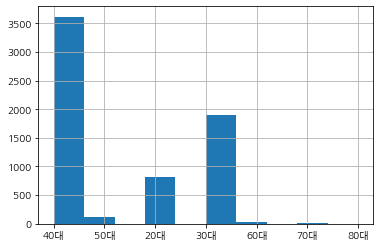

In [10]:
df_member["나이"].hist() 

#### -----> 40대 -> 30대 -> 20대 -> 50대 순서를 보임

In [11]:
df_member["나이"].value_counts()

40대    3614
30대    1902
20대     821
50대     125
60대      36
70대      18
80대       5
Name: 나이, dtype: int64

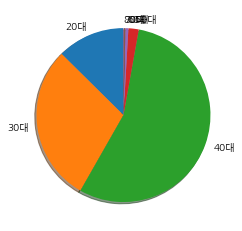

In [12]:
labels=['20대','30대','40대','50대','60대','70대','80대']
ratio=[821,1902,3614,125,36,18,5]
plt.pie(ratio,labels=labels,shadow=True,startangle=90)
plt.show()

In [13]:
import scipy.stats as stats

stats.f_oneway(df_result1['영업이익'][df_result1['나이'] == '20대'],
               df_result1['영업이익'][df_result1['나이'] == '30대'],
              df_result1['영업이익'][df_result1['나이'] == '40대'],
              df_result1['영업이익'][df_result1['나이'] == '50대'],
              df_result1['영업이익'][df_result1['나이'] == '60대'],
              df_result1['영업이익'][df_result1['나이'] == '70대'],
              df_result1['영업이익'][df_result1['나이'] == '80대'])

F_onewayResult(statistic=10.988791795442163, pvalue=3.373770395199193e-12)

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


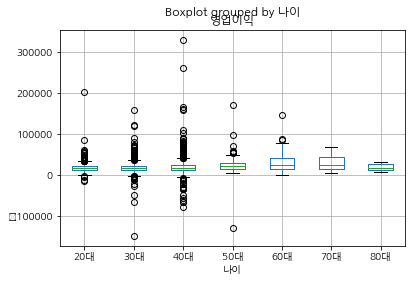

In [14]:
df_result1.boxplot(column="영업이익",by="나이")

In [15]:
df_result1.groupby(df_result1['나이']).mean()

,영업이익,Unnamed: 0,사용가능 적립금
나이,,,
20대,18392.246876,3565.178218,1682.185644
30대,19097.561502,3335.882949,2063.951041
40대,19103.654656,3250.711880,2139.279017
50대,25097.254802,1855.763636,4657.300000
60대,35041.714216,1888.592593,3991.481481
70대,30946.745380,2510.500000,6188.888889
80대,18731.166667,3661.600000,1640.000000


#### 1,나이대별 유입경로_60대

In [16]:
df_age_60=df_result1.groupby('나이').get_group('60대')

In [17]:
df_age_60["유입경로"].value_counts()

인터넷기사광고    12
전단지광고       3
지인추천        3
잡지광고        3
신문광고        3
기타          2
인터넷검색       1
Name: 유입경로, dtype: int64

(array([12.,  3.,  0.,  3.,  0.,  1.,  3.,  0.,  2.,  3.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

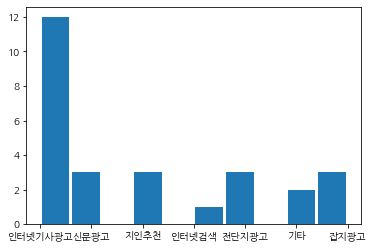

In [18]:
plt.hist(df_age_60["유입경로"],histtype='bar',rwidth=0.9)

In [19]:
df_age_60["사업자구분"].value_counts()

사업자    15
개인     12
Name: 사업자구분, dtype: int64

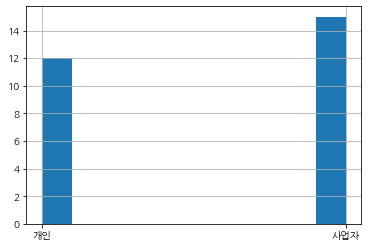

In [20]:
df_age_60["사업자구분"].hist()

#### 2,나이대별 유입경로_30대 -->유튜부

In [21]:
df_age_30=df_result1.groupby('나이').get_group('30대')

In [22]:
df_age_30["유입경로"].value_counts()

유튜브광고      529
이메일광고      382
전단지광고      176
SNS광고      140
인터넷기사광고    111
지인추천        99
인터넷검색       90
잡지광고        87
카카오톡광고      81
기타          57
신문광고        25
Name: 유입경로, dtype: int64

(array([140.,  81., 529., 382., 111.,  25.,  99., 176.,  57., 177.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

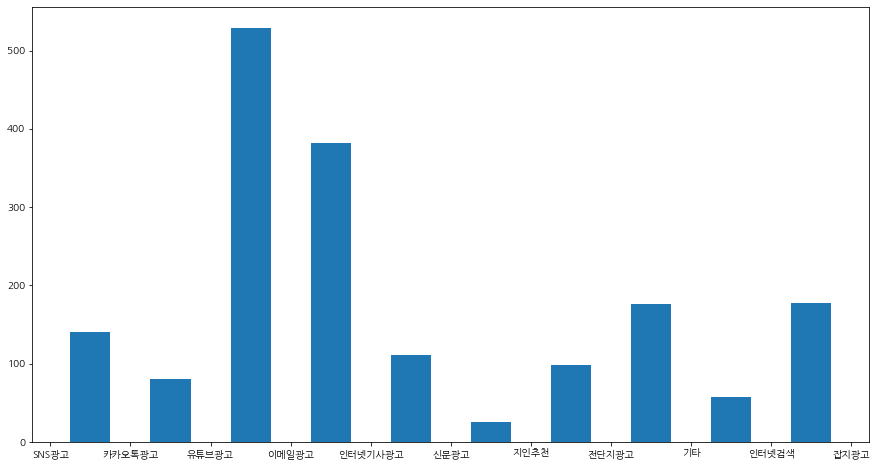

In [23]:
plt.rcParams["figure.figsize"]=(15,8)
plt.hist(df_age_30["유입경로"],histtype='bar',rwidth=0.5)

#### 3,나이대별 유입경로_40대 -->블로그 광고 

In [24]:
df_age_40=df_result1.groupby('나이').get_group('40대')

In [25]:
df_age_40["유입경로"].value_counts()

블로그광고      624
SNS광고      614
전단지광고      317
인터넷검색      196
잡지광고       178
지인추천       143
기타         102
인터넷기사광고     16
유튜브광고        7
Name: 유입경로, dtype: int64

(array([614., 624., 196., 102.,   0.,   7.,  16., 178., 143., 317.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

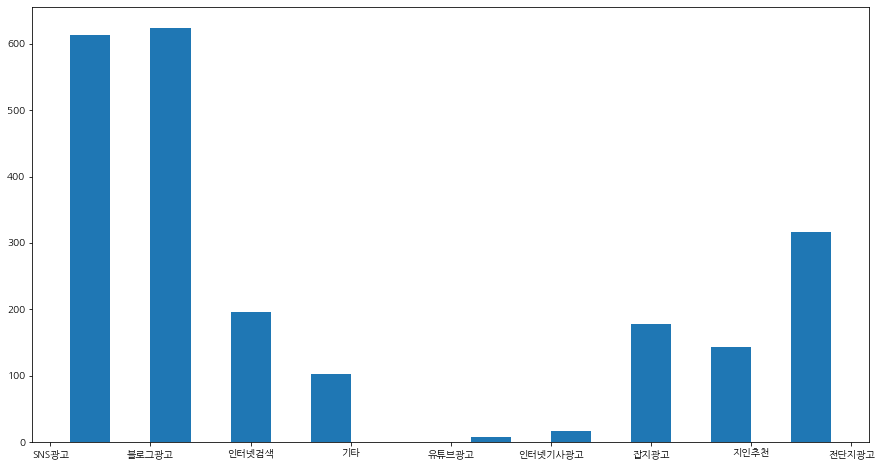

In [26]:
plt.rcParams["figure.figsize"]=(15,8)
plt.hist(df_age_40["유입경로"],histtype='bar',rwidth=0.5)

# 1-2, 나이별 사용하는 상품 분포보기

In [27]:
df_product.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '카테고리', '판매가', '품절여부', '후기', '분류카테고리'],
      dtype='object')

In [28]:
df_order.columns

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보',
       '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액',
       '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량', '영업이익'],
      dtype='object')

In [29]:
df_new2=pd.pivot_table(data=df_product,index='상품코드',values='분류카테고리',aggfunc='first').reset_index()
df_new2.head(3)

,상품코드,분류카테고리
0,38,용기
1,39,용기
2,40,용기


In [30]:
df_new2=df_new2.rename({'상품코드':'상품번호','분류카테고리':'분류카테고리'},axis='columns')
df_new2.head(2)

,상품번호,분류카테고리
0,38,용기
1,39,용기


In [31]:
df_order.columns

Index(['Unnamed: 0', '결제수단', '공급원가', '교환구분', '네이버 포인트', '배송번호', '배송비 정보',
       '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액', '상품명', '상품번호', '상품별 추가할인금액',
       '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가',
       '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량', '영업이익'],
      dtype='object')

# 2, 사업자

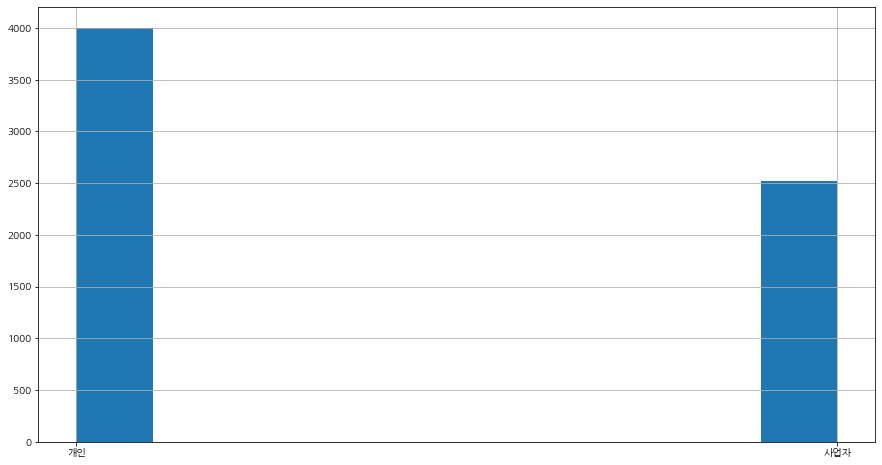

In [32]:
df_member["사업자구분"].hist() 

---> 개인의 분포가 많다 .

In [33]:
df_member["사업자구분"].value_counts()

개인     4004
사업자    2519
Name: 사업자구분, dtype: int64

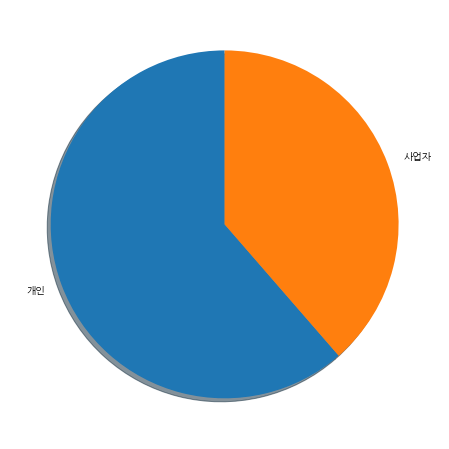

In [34]:
labels=['개인','사업자']
ratio=[4004,2519]
plt.pie(ratio,labels=labels,shadow=True,startangle=90)
plt.show()

#### t-test검정

In [35]:
t_result=stats.ttest_ind(df_result1["사업자구분"]=="사업자",df_result1["사업자구분"]=="개인")
t,p=t_result.statistic.round(3),t_result.pvalue.round(10)
print("2-Sample t-test")
print(t_result)
print("t:{}".format(t))
print("p:{}".format(p))

2-Sample t-test
Ttest_indResult(statistic=-26.160581769808154, pvalue=6.3974653659278175e-146)
t:-26.161
p:0.0


In [36]:
df_result1.groupby('사업자구분').mean()

,영업이익,Unnamed: 0,사용가능 적립금
사업자구분,,,
개인,18856.906148,3349.502741,1287.104482
사업자,19901.231041,3192.947368,3516.432447


/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


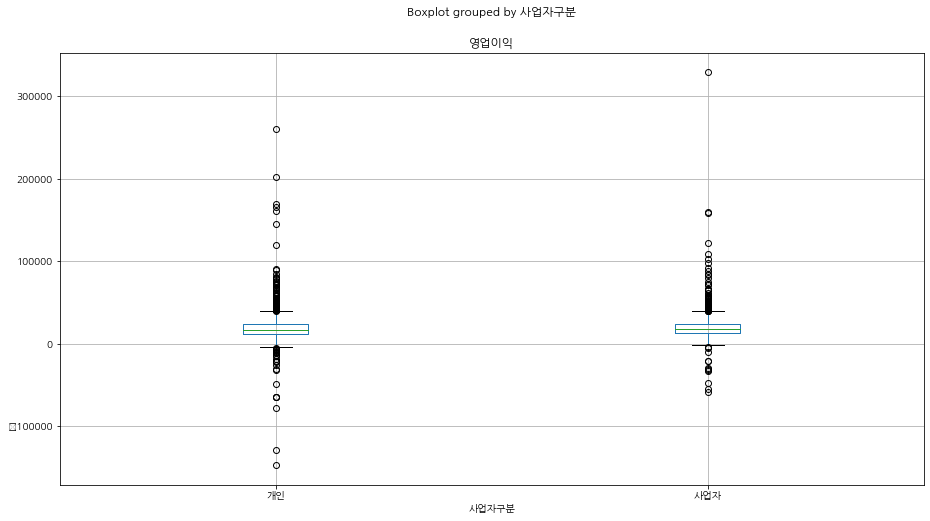

In [37]:
df_result1.boxplot(column='영업이익',by="사업자구분")

# 3, 공급사별 영업이익

In [38]:
df_cat.head(1)

,Unnamed: 0,Unnamed: 0.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,배송완료일,...,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리,영업이익
0,0,0,무통장입금,44550.0,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,2019-01-11 오전 5:32,...,0,71450,42602,False,False,True,1,300,용기,26900.0


In [39]:
df_product["공급사"].value_counts()

패커스        923
다이찌롱스토어     69
(주)니드코      15
다인컴즈         9
Name: 공급사, dtype: int64

In [40]:
df_product.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '#', '공급사', '과세/면세', '담기', '매입가',
       '상품명(기본)', '상품코드', '재입고알림', '카테고리', '판매가', '품절여부', '후기', '분류카테고리'],
      dtype='object')

In [41]:
df_new3=pd.pivot_table(data=df_product,index="상품코드",values='공급사',aggfunc='first').reset_index()
df_new3.head(3)

,상품코드,공급사
0,38,패커스
1,39,패커스
2,40,패커스


In [42]:
df_new3=df_new3.rename({'상품코드':'상품번호','분류카테고리':'분류카테고리'},axis='columns')
df_new3.head(2)

,상품번호,공급사
0,38,패커스
1,39,패커스


In [43]:
type(df_new3["상품번호"][0])

numpy.int64

In [44]:
type(df_cat["상품번호"][0])

df_cat['상품번호'] = df_cat['상품번호'].astype(float)

In [45]:
df_result3=pd.merge(df_new3,df_cat,on='상품번호')
df_result3.head(5)

,상품번호,공급사,Unnamed: 0,Unnamed: 0.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,...,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리,영업이익
0,38,패커스,47,47,적립금,42900.0,교환안함,55870,D-20190101-0000106-01,무료,...,0,68970,43348,False,False,False,1,3000,용기,84040.0
1,38,패커스,115,115,무통장입금,42900.0,교환안함,0,D-20190102-0000305-00,무료,...,0,68970,43481,False,False,True,1,3000,용기,18810.0
2,38,패커스,176,176,무통장입금,42900.0,교환안함,0,D-20190102-0000794-00,무료,...,0,68970,43623,False,False,True,1,3000,용기,41750.0
3,38,패커스,184,184,무통장입금,42900.0,교환안함,0,D-20190102-0000846-01,무료,...,0,68970,43640,False,False,False,1,3000,용기,8360.0
4,38,패커스,337,336,카드,42900.0,교환안함,0,D-20190103-0000849-05,무료,...,0,68970,43964,False,False,True,1,3000,용기,28820.0


In [81]:
df_패커스 = df_result3[df_result3["공급사"] == "패커스"]

df_패커스

,상품번호,공급사,Unnamed: 0,Unnamed: 0.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,...,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량,분류카테고리,영업이익
0,38,패커스,47,47,적립금,42900.0,교환안함,55870,D-20190101-0000106-01,무료,...,0,68970,43348,False,False,False,1,3000,용기,84040.0
1,38,패커스,115,115,무통장입금,42900.0,교환안함,0,D-20190102-0000305-00,무료,...,0,68970,43481,False,False,True,1,3000,용기,18810.0
2,38,패커스,176,176,무통장입금,42900.0,교환안함,0,D-20190102-0000794-00,무료,...,0,68970,43623,False,False,True,1,3000,용기,41750.0
3,38,패커스,184,184,무통장입금,42900.0,교환안함,0,D-20190102-0000846-01,무료,...,0,68970,43640,False,False,False,1,3000,용기,8360.0
4,38,패커스,337,336,카드,42900.0,교환안함,0,D-20190103-0000849-05,무료,...,0,68970,43964,False,False,True,1,3000,용기,28820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29454,1606,패커스,16713,16699,카드,24750.0,교환안함,0,D-20190524-0000074-01,무료,...,0,35000,78091,False,False,True,1,1500,기타,31310.0
29455,1606,패커스,16800,16786,"적립금,카드",24750.0,교환안함,0,D-20190525-0000018-01,무료,...,0,35000,78260,False,False,True,1,1500,기타,15110.0
29456,1606,패커스,17022,17008,카드,24750.0,교환안함,0,D-20190527-0001091-03,무료,...,0,35000,78710,False,False,True,1,1500,기타,16800.0
29457,1606,패커스,17302,17286,"적립금,카드",24750.0,교환안함,0,D-20190529-0000665-00,무료,...,0,35000,79284,False,False,True,1,1500,기타,9710.0


In [82]:
df_다이찌롱스토어 = df_result3[df_result3["공급사"] != "패커스"]

In [84]:
다이찌롱_영업이익 = df_다이찌롱스토어["영업이익"].sum()
패커스_영업이익 = df_패커스["영업이익"].sum()

총영업이익 = 다이찌롱_영업이익 + 패커스_영업이익

In [87]:
print(총영업이익)

print(패커스_영업이익)

print(다이찌롱_영업이익)

638034770.0
634685990.0
3348780.0


<BarContainer object of 2 artists>

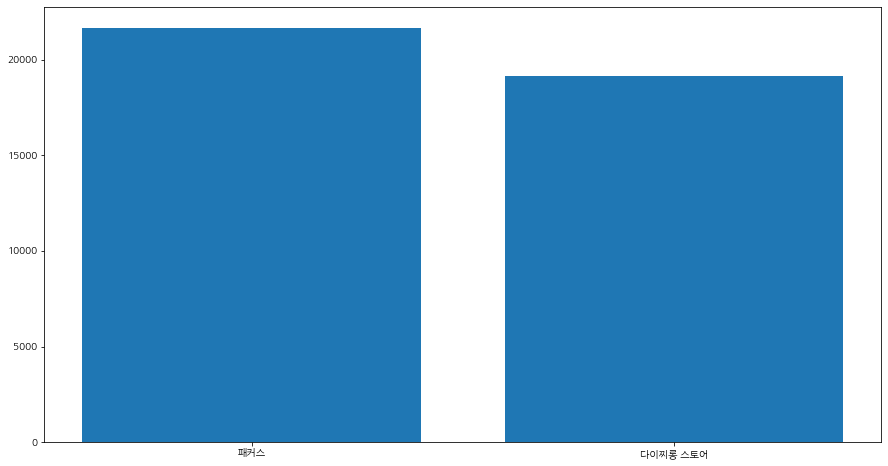

In [96]:
패커스_len = len(df_패커스)
다이찌롱_len = len(df_다이찌롱스토어)

패커스_numer = 패커스_영업이익/패커스_len
다이찌롱_numer = 다이찌롱_영업이익/다이찌롱_len
영업이익_denom = 패커스_영업이익/패커스_len + 다이찌롱_영업이익/다이찌롱_len


공급사_list = ["패커스", "다이찌롱 스토어"]
영업이익_list = [패커스_numer, 다이찌롱_numer]


plt.bar(공급사_list, 영업이익_list)

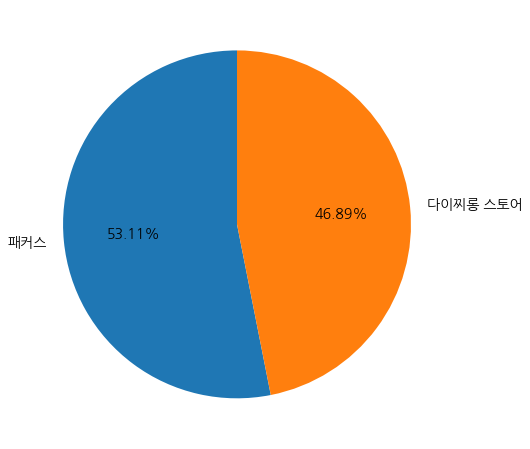

In [97]:
labels=['패커스','다이찌롱 스토어']
ratio=[패커스_numer/영업이익_denom, 다이찌롱_numer/영업이익_denom]
plt.pie(ratio,
        labels=labels,
        autopct='%1.2f%%',
        startangle=90,
       textprops={'fontsize':14})
plt.show()

In [46]:
df_result3.columns

Index(['상품번호', '공급사', 'Unnamed: 0', 'Unnamed: 0.1', '결제수단', '공급원가', '교환구분',
       '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명', '상품별 추가할인금액', '수령인 주소', '주문경로', '주문번호', '주문일시', '주문자ID', '카드사',
       '쿠폰 할인금액', '판매가', '품목번호', '친환경', '사은품', '회원', '주문수량', '총수량', '분류카테고리',
       '영업이익'],
      dtype='object')

In [65]:
df_result3.groupby(df_result3['영업이익']).sum()

,상품번호,Unnamed: 0,Unnamed: 0.1,공급원가,네이버 포인트,사용한 적립금액,상품구매금액,상품별 추가할인금액,쿠폰 할인금액,판매가,품목번호,친환경,사은품,회원,주문수량,총수량
영업이익,,,,,,,,,,,,,,,,
-477630.0,1077,36001,35965,44550.0,0,0,71450,13600,0,71450,30202,0.0,0.0,1.0,1,300
-360140.0,1270,36571,36534,8140.0,0,0,16150,3400,0,16150,31029,0.0,0.0,1.0,1,200
-311000.0,1091,36108,36071,42900.0,0,0,68970,13100,0,68970,30358,0.0,0.0,1.0,1,3000
-260500.0,1055,8110,8104,66000.0,0,0,83110,0,0,83110,60552,0.0,0.0,1.0,1,300
-235790.0,1268,35189,35153,5500.0,0,0,11660,2300,0,11660,28993,0.0,0.0,1.0,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468000.0,1180,28986,28958,50600.0,0,0,84600,23000,0,84600,20091,0.0,0.0,1.0,1,400
472500.0,437,1847,1846,47300.0,0,0,75570,15900,0,75570,47259,0.0,0.0,1.0,1,1000
591600.0,397,46307,46264,49500.0,0,28610,87200,10460,0,87200,2170,0.0,0.0,1.0,1,1000


# 4, 나이별 선호하는 카테고리

In [49]:
df_cat.columns
df_cat["영업이익"]=df_order["상품구매금액"]-df_order["공급원가"]*df_order["주문수량"]

In [50]:
df_new4=pd.pivot_table(data=df_cat,index="주문자ID",values='분류카테고리',aggfunc='first').reset_index()
df_new4.head(3)

,주문자ID,분류카테고리
0,100304734@n,용기
1,1003409866@k,용기
2,100381931@n,기타


In [51]:
df_new4=df_new4.rename({'주문자ID':'ID','영업이익':'영업이익'},axis='columns')

In [52]:
df_result4=pd.merge(df_new4,df_member,on='ID')
df_result4.head(5)

,ID,분류카테고리,Unnamed: 0,나이,사용가능 적립금,성별,주소(동/읍/면),최종접속일,최종주문일,유입경로,유입기기,회원 가입일,사업자구분,회원구분
0,100304734@n,용기,6308,40대,100,남자,주소없음,2019-05-09 오후 2:09,2019-05-09 오후 2:12,SNS광고,모바일,2019-05-09,개인,일반
1,1003409866@k,용기,4442,20대,55900,남자,서울특별시 강남구 광평로51길 27 (수서동),2019-05-28 오후 4:40,2019-05-28 오후 4:41,카카오톡광고,모바일,2019-01-07,개인,일반
2,100381931@n,기타,3587,40대,1000,남자,대구광역시 남구 대봉로 183 (이천동),2019-02-10 오후 9:37,2019-02-10 오후 9:46,SNS광고,모바일,2018-10-31,개인,일반
3,1004498382@k,용기,4492,40대,1300,남자,경기도 부천시 부천로476번길 46 (오정동),2019-01-09 오후 12:30,2019-01-09 오후 12:49,SNS광고,모바일,2019-01-09,개인,일반
4,1004547839@k,용기,4493,40대,2400,남자,전라남도 나주시 그린로 317-7 (빛가람동),2019-02-14 오후 2:08,2019-01-09 오후 1:48,블로그광고,PC,2019-01-09,개인,일반


In [53]:
df1_age_20=df_result4.groupby('나이').get_group('20대')
df1_age_30=df_result4.groupby('나이').get_group('30대')
df1_age_40=df_result4.groupby('나이').get_group('40대')
df1_age_50=df_result4.groupby('나이').get_group('50대')
df1_age_60=df_result4.groupby('나이').get_group('60대')
df1_age_70=df_result4.groupby('나이').get_group('70대')
df1_age_80=df_result4.groupby('나이').get_group('80대')

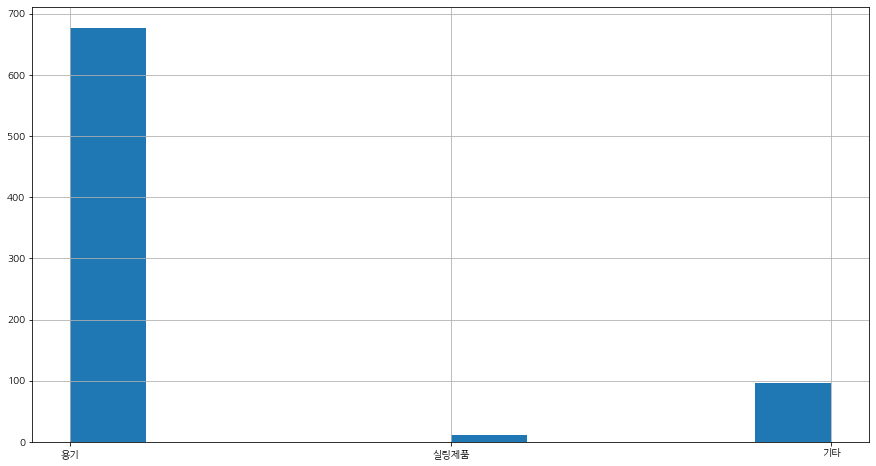

In [54]:
df1_age_20["분류카테고리"].hist() 

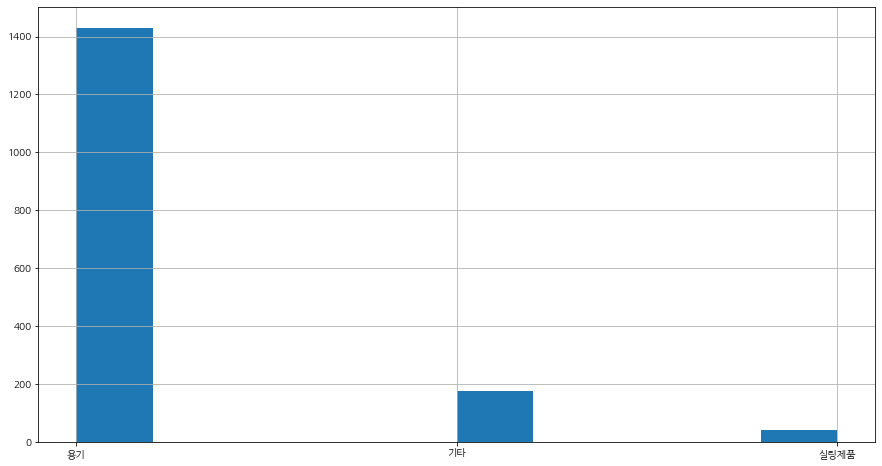

In [55]:
df1_age_30["분류카테고리"].hist() 

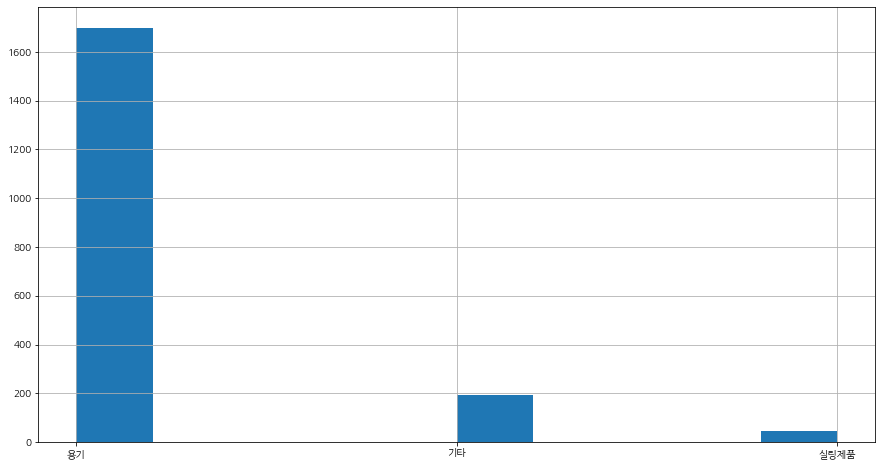

In [56]:
df1_age_40["분류카테고리"].hist() 

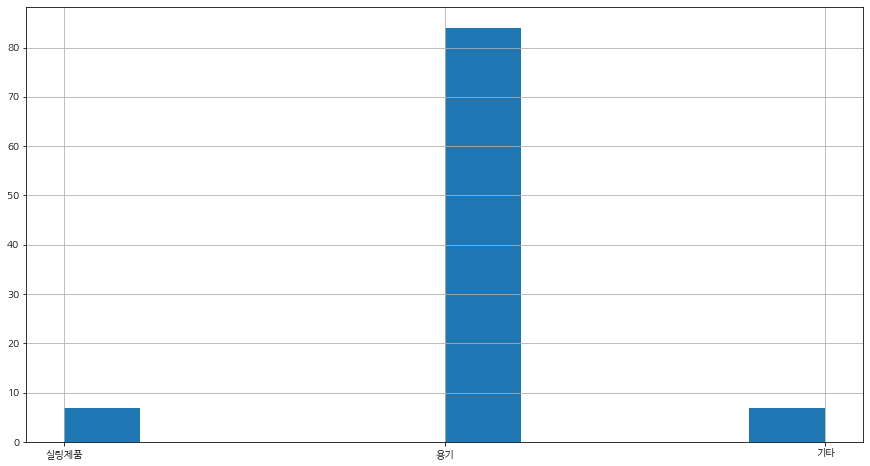

In [57]:
df1_age_50["분류카테고리"].hist() 

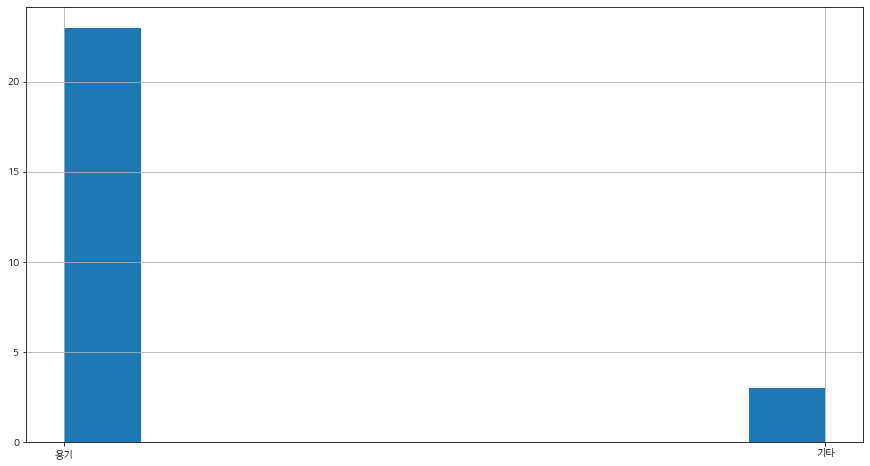

In [58]:
df1_age_60["분류카테고리"].hist() 

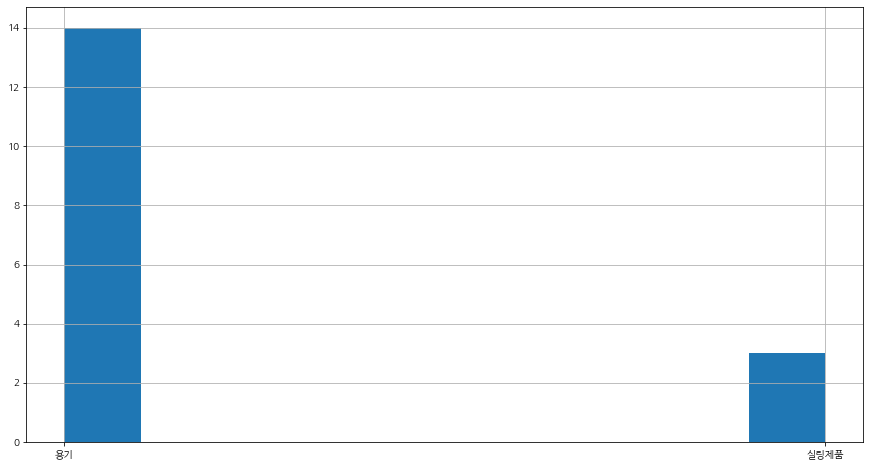

In [59]:
df1_age_70["분류카테고리"].hist() 

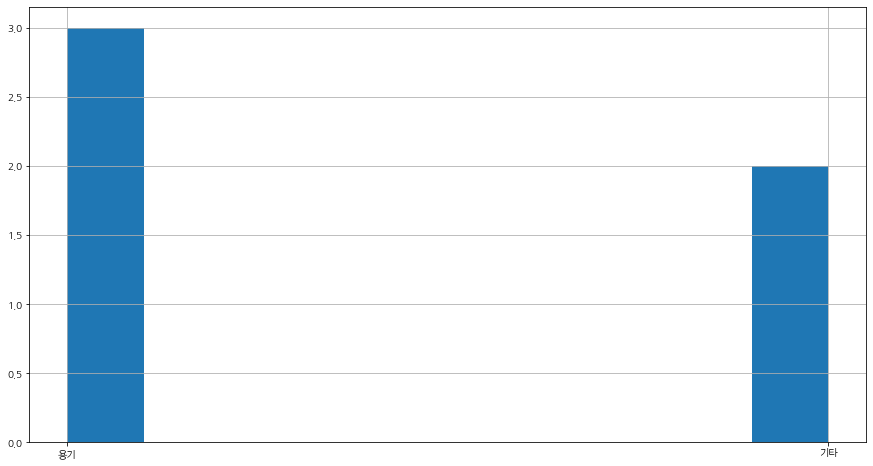

In [60]:
df1_age_80["분류카테고리"].hist() 